# Lab 4: 正则化 Regularization ——预测区域房价

## 1. 使用Pandas读取数据

In [1]:
import os
import sys
import pandas as pd

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO
df = pd.read_csv(FilesIO.getLectureData('Boston.csv'), index_col=0) 

In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [4]:
pd.set_option("display.max_columns", None)
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

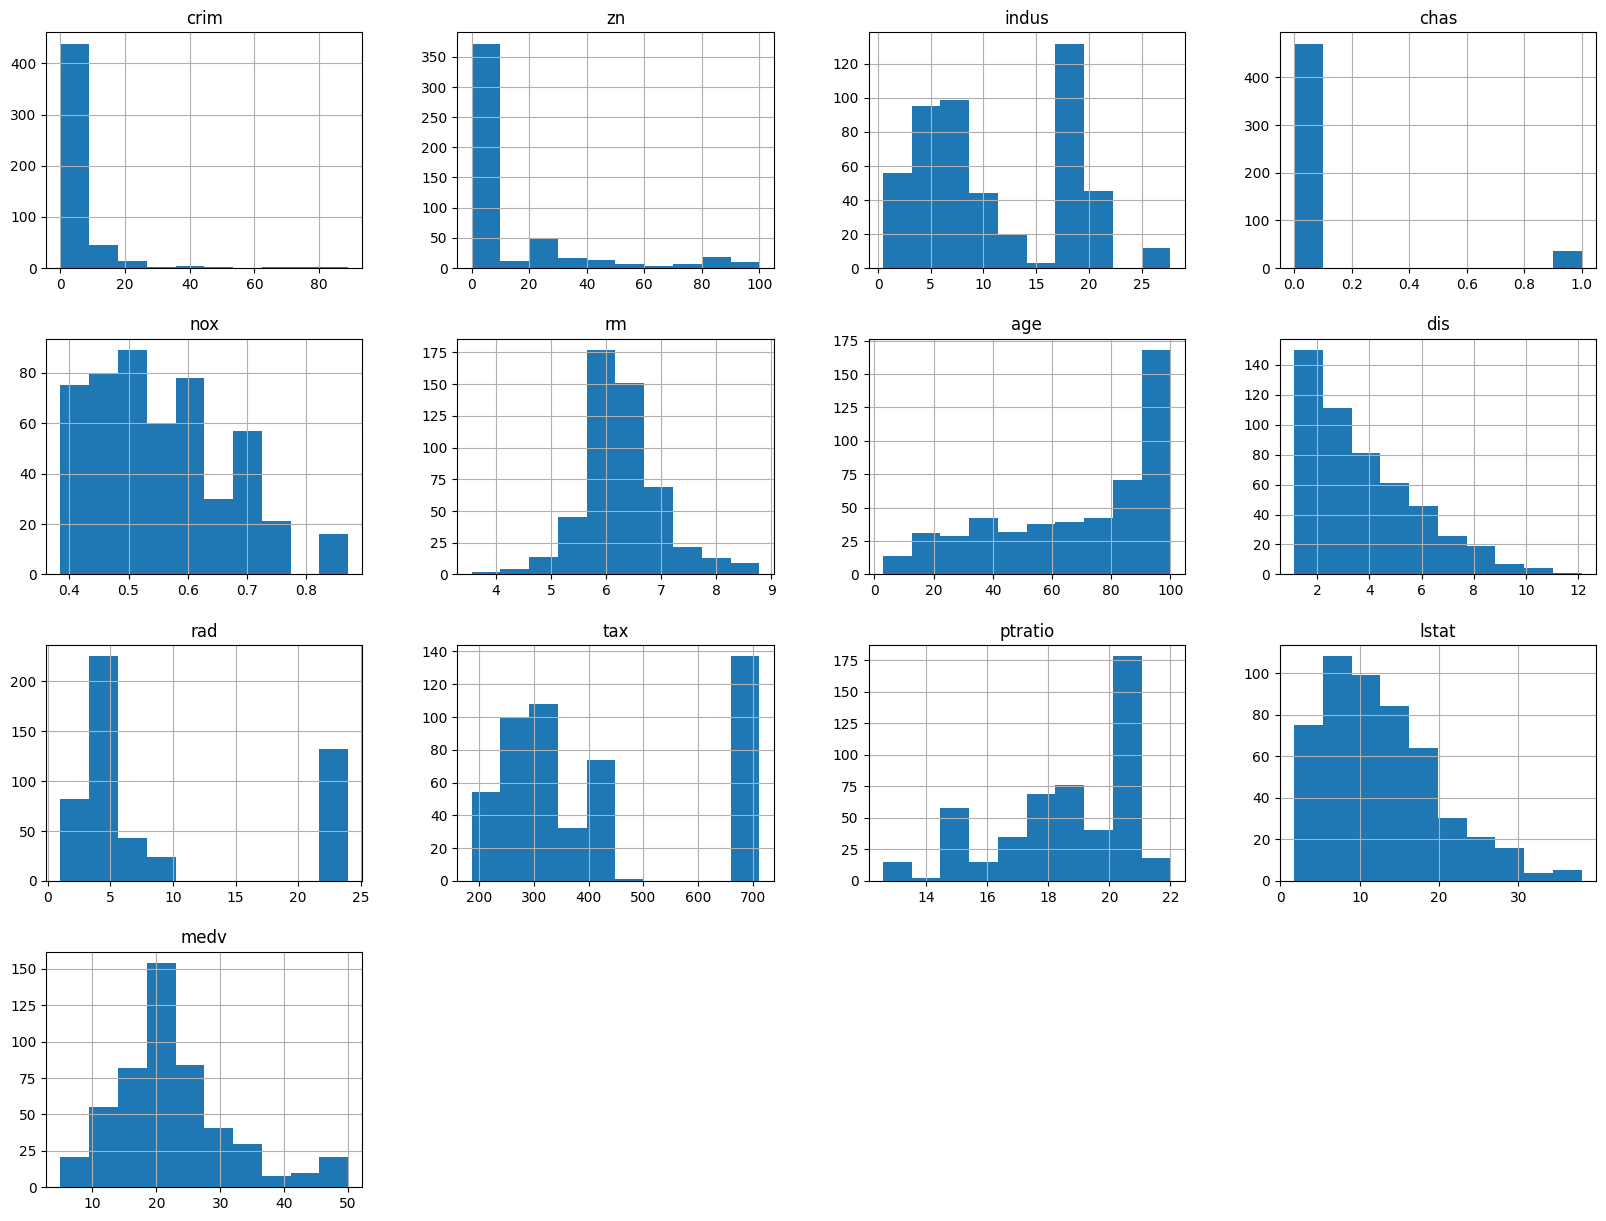

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
df.hist(figsize = (20, 15))

## 2. 查看是否有缺失数据

In [6]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64


### 直接删除缺失数据
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [7]:
# drop missing cases
df = df.dropna()

## 3. 选择要使用的特征（features）X 和输出/目标变量Y

In [8]:
y = df.medv

### 提取数值特征
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [9]:
# Create all features
X = df.drop(['medv'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 51.4 KB


## 4. 构建训练集和测试集

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### 标准化（Standardization）

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

## 5. Linear regression

In [12]:
from sklearn.linear_model import LinearRegression
# 模型的加载
linreg = LinearRegression()

In [13]:
# 模型的训练
linreg.fit(X_train, y_train)

LinearRegression()

In [14]:
# 将特征名称与系数对应
coef = linreg.coef_

pd.DataFrame(coef, 
             X.columns, 
             columns=['coef'])

,coef
crim,-1.311137
zn,1.452971
indus,-0.258457
chas,0.358969
nox,-1.974470
rm,2.090437
age,0.455328
dis,-3.231919
rad,2.412614
tax,-2.225165


In [15]:
lin_pred = linreg.predict(X_test)

# 测试集上的MSE
from sklearn.metrics import mean_squared_error
mse_test =mean_squared_error(y_test, lin_pred)
print('MSE test set', round(mse_test, 2))

MSE test set 38.74


## 5. Lasso regression

设置调整参数（在sklearn里为alpha）=1, fit Lasso regression
https://blog.csdn.net/MRxjh/article/details/78489843
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### step 1: 加载Lasso线性回归

In [16]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)

### step 2: 在训练集上训练

In [17]:
reg.fit(X_train, y_train)

Lasso(alpha=1)

### step 3: 查看在训练集上估计的Lasso线性回归参数

In [18]:
# 将特征名称与系数对应
coefl1 = reg.coef_

pd.DataFrame(coefl1, 
             X.columns, 
             columns=['coef'])

,coef
crim,-0.200476
zn,0.000000
indus,-0.000000
chas,0.000000
nox,-0.000000
rm,2.342078
age,-0.000000
dis,-0.000000
rad,-0.000000
tax,-0.068503


计算训练集的MSE

In [19]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

MSE training set 25.94


### step 4: 在测试集上预测

In [20]:
# Test data
pred = reg.predict(X_test)

# 测试集上的MSE
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE test set 44.7


### Q: 尝试设置alpha = 2, 0.1， 结果怎么样？

### 5.1 调整参数如何影响模型表现

取100个不同的调整参数值
https://blog.csdn.net/qq_39432161/article/details/84673127
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
对每一个值，用lasso regression拟合

In [21]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)

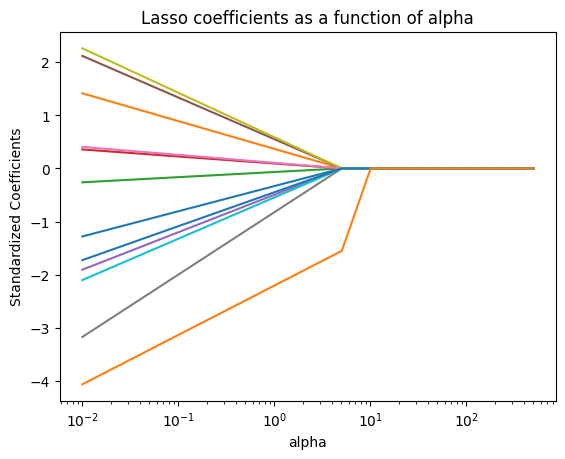

In [22]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [23]:
coefs;

### 5.2 用交叉验证法(cross-validation)选取最优调整参数

使用LassoCV函数：

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

class sklearn.linear_model.LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic'

主要参数：

eps：备选alpha最大值与最小值之比，默认为0.001，即alpha_min / alpha_max = 1e-3.

n_alphas：备选alpha值的个数，默认为100个。

cv: 交叉验证法折数K，默认为none，5折交叉验证。

max_iter: 最大迭代次数，默认为1000

#### 5.2.1 K-fold cross-validation

In [24]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation, n_alphas=100
best_model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
best_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

使用的alpha序列

In [25]:
best_model.alphas_

array([6.61220116, 6.16656094, 5.75095537, 5.36336022, 5.00188769,
       4.6647772 , 4.35038683, 4.05718532, 3.78374461, 3.52873289,
       3.2909081 , 3.06911191, 2.86226404, 2.66935702, 2.48945129,
       2.32167061, 2.16519778, 2.01927069, 1.88317861, 1.75625867,
       1.63789272, 1.52750423, 1.42455556, 1.32854528, 1.23900577,
       1.15550093, 1.07762404, 1.00499578, 0.93726243, 0.87409408,
       0.81518306, 0.76024245, 0.70900466, 0.66122012, 0.61665609,
       0.57509554, 0.53633602, 0.50018877, 0.46647772, 0.43503868,
       0.40571853, 0.37837446, 0.35287329, 0.32909081, 0.30691119,
       0.2862264 , 0.2669357 , 0.24894513, 0.23216706, 0.21651978,
       0.20192707, 0.18831786, 0.17562587, 0.16378927, 0.15275042,
       0.14245556, 0.13285453, 0.12390058, 0.11555009, 0.1077624 ,
       0.10049958, 0.09372624, 0.08740941, 0.08151831, 0.07602425,
       0.07090047, 0.06612201, 0.06166561, 0.05750955, 0.0536336 ,
       0.05001888, 0.04664777, 0.04350387, 0.04057185, 0.03783

输出最优的调整参数

In [26]:
best_model.alpha_

0.006612201163823928

#### 5.2.2 最好的模型

In [27]:
# 将特征名称与系数对应
best_coef = best_model.coef_


pd.DataFrame(best_coef, 
             X.columns, 
             columns=['coef'])

,coef
crim,-1.291214
zn,1.427053
indus,-0.260790
chas,0.357617
nox,-1.929965
rm,2.108256
age,0.422415
dis,-3.193154
rad,2.311828
tax,-2.143603


## 6. 评估模型

使用选出的最优调整参数值

In [28]:
y_pred = best_model.predict(X_test)
mean_squared_error(y_test, y_pred)

38.712606025848984

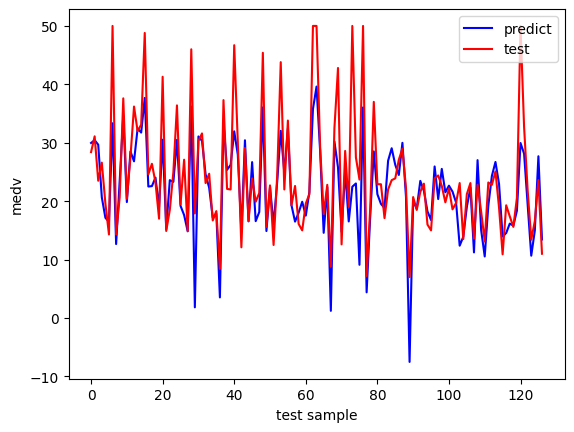

In [29]:
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),np.array(y_test),'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("test sample")
plt.ylabel('medv')
plt.show()

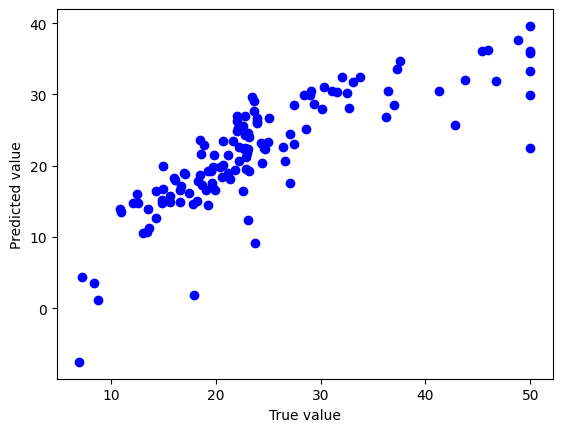

In [30]:
plt.figure()
plt.plot(np.array(y_test),y_pred, 'bo',label="predict") ## bo: 蓝色的圈
plt.xlabel("True value")
plt.ylabel('Predicted value')
plt.show()

画出在这一系列的调整参数所对应的交叉验证MSE。Lasso path: plot results of cross-validation with mean squared erros

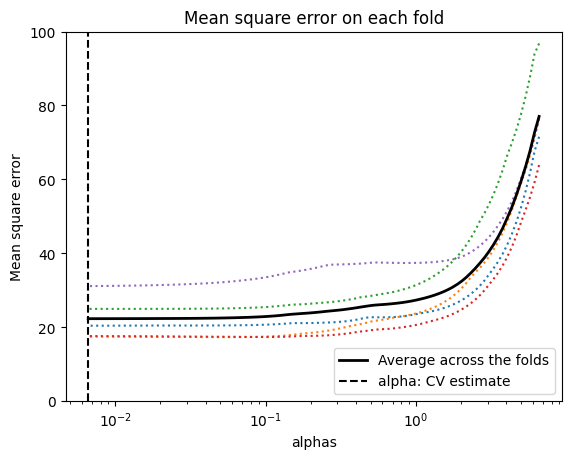

In [31]:
plt.semilogx(best_model.alphas_, best_model.mse_path_, ":")
plt.plot(
    best_model.alphas_ ,
    best_model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    best_model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0, 100
plt.ylim(ymin, ymax);

### 如何做L2正则化的线性回归（岭回归）？

使用RidgeCV函数

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
https://www.bbsmax.com/A/qVdeLV6n5P/
    

### 引入正则化的逻辑回归，用交叉验证法选择最优调整参数 （HW3 选做题）

LogisticRegressionCV函数：

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

class sklearn.linear_model.LogisticRegressionCV(*, Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None)

主要参数：
Cs: 备选调整参数C（1/λ）的个数。默认为10个

cv: 交叉验证折数K。

penalty: 正则化惩罚。可选‘l1’, ‘l2’, ‘elasticnet’，默认为‘l2’。

solver：求解优化问题方法。不同惩罚项支持的solver不同：

‘lbfgs’ - [‘l2’]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’]

‘newton-cholesky’ - [‘l2’]

‘sag’ - [‘l2’]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’]

class_weight: 类权重。如果数据很不平衡，可以设置class_weight = ‘balanced’改进。

multi_class： {‘auto, ‘ovr’, ‘multinomial’}, default=’auto’。当Y的类别不止两类时，可选择‘ovr’为一对多，‘multinomial’为多项逻辑回归。